In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('input/spotify_songs.csv', sep=',')

songs = df[['playlist_genre', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
print(songs.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   playlist_genre    32833 non-null  object 
 1   danceability      32833 non-null  float64
 2   energy            32833 non-null  float64
 3   key               32833 non-null  int64  
 4   loudness          32833 non-null  float64
 5   mode              32833 non-null  int64  
 6   speechiness       32833 non-null  float64
 7   acousticness      32833 non-null  float64
 8   instrumentalness  32833 non-null  float64
 9   liveness          32833 non-null  float64
 10  valence           32833 non-null  float64
 11  tempo             32833 non-null  float64
 12  duration_ms       32833 non-null  int64  
dtypes: float64(9), int64(3), object(1)
memory usage: 3.3+ MB
None


In [3]:
songs.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [4]:
# Remove duplicates
duplicates = songs.duplicated()
print("Number of duplicate rows: ", duplicates.sum())
songs = songs.drop_duplicates()


Number of duplicate rows:  3041


In [5]:
print("Total number of songs: ", len(songs))
print(songs['playlist_genre'].value_counts())

Total number of songs:  29792
playlist_genre
rap      5433
edm      5400
r&b      5041
pop      5012
latin    4578
rock     4328
Name: count, dtype: int64


In [6]:
min = songs['playlist_genre'].value_counts().min()
# Take only min songs from each genre
songs = songs.groupby('playlist_genre').head(min)

In [7]:
map_genres = {genre: i for i, genre in enumerate(songs['playlist_genre'].unique())}
map_genres 

{'pop': 0, 'rap': 1, 'rock': 2, 'latin': 3, 'r&b': 4, 'edm': 5}

In [8]:
songs_data = songs.drop('playlist_genre', axis=1)
songs_target = songs['playlist_genre']
songs_target = songs_target.map(map_genres)

# Normalize data to 0-1 range
songs_data = (songs_data - songs_data.min()) / (songs_data.max() - songs_data.min())

songs_data_train, songs_data_test, songs_target_train, songs_target_test = train_test_split(songs_data, songs_target, test_size=0.2, random_state=0)
# songs_data_test, songs_data_val, songs_target_test, songs_target_val = train_test_split(songs_data_test, songs_target_test, test_size=0.5, random_state=0)

print("Training set size: ", len(songs_data_train))
print("Test set size: ", len(songs_data_test))
#print("Validation set size: ", len(songs_data_val))

Training set size:  20774
Test set size:  5194


In [9]:
## Data analysis
cols = ['danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms']

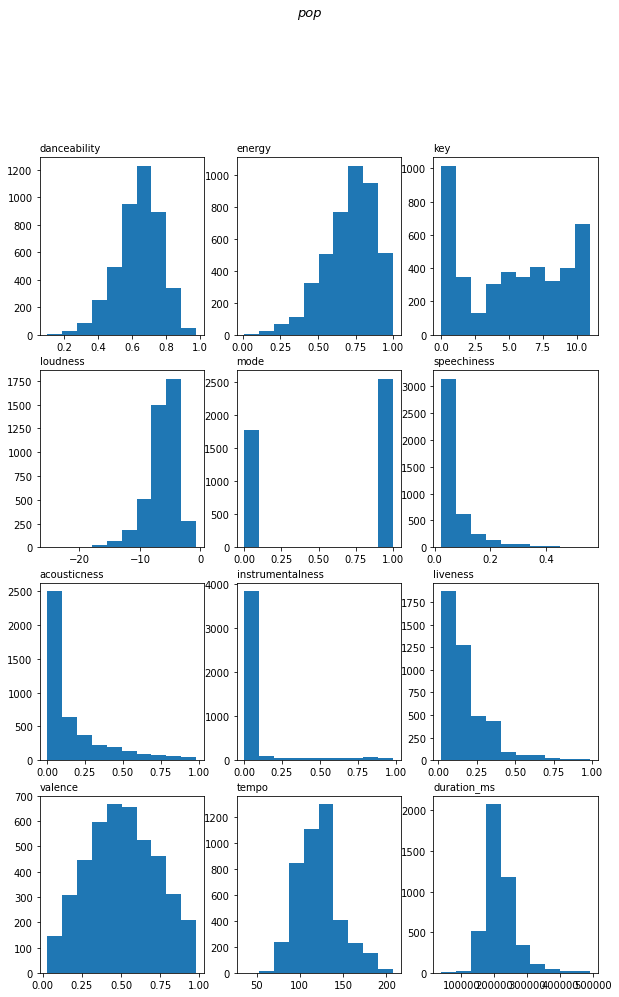

In [11]:
pop = songs[songs['playlist_genre']=='pop']

num=0
for column in cols:
    num+=1

    plt.subplot(4,3, num)
    plt.rcParams['figure.figsize'] = [10, 15]
    plt.hist(pop[column], label=column)

    plt.title(column, loc='left', fontsize=10, fontweight=0)

# general title
plt.suptitle("pop", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)

plt.show()

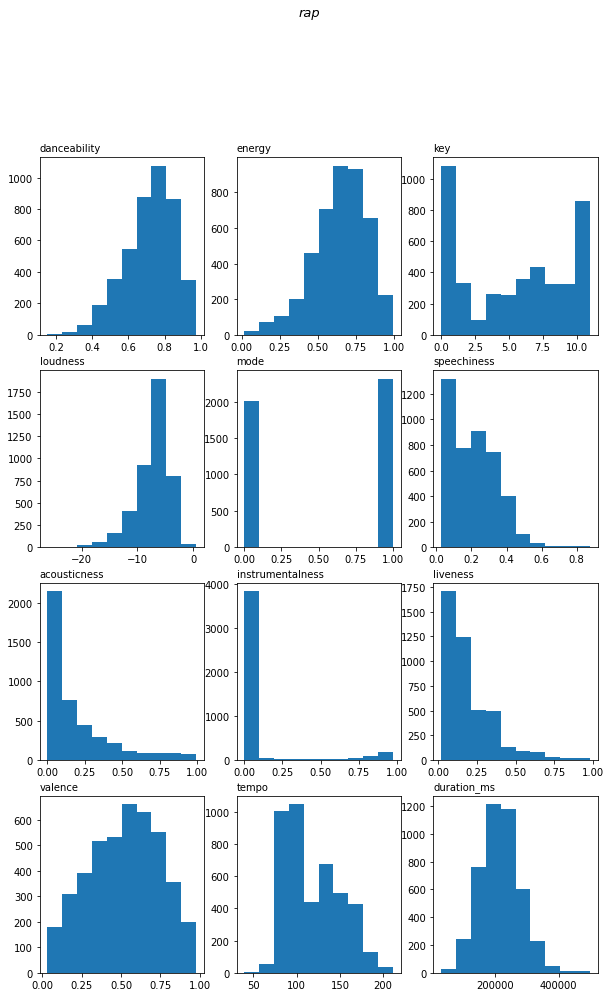

In [31]:
rap = songs[songs['playlist_genre']=='rap']

num=0
for column in cols:
    num+=1

    plt.subplot(4,3, num)
    plt.rcParams['figure.figsize'] = [10, 15]
    plt.hist(rap[column], label=column)

    plt.title(column, loc='left', fontsize=10, fontweight=0)

# general title
plt.suptitle("rap", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)

plt.show()

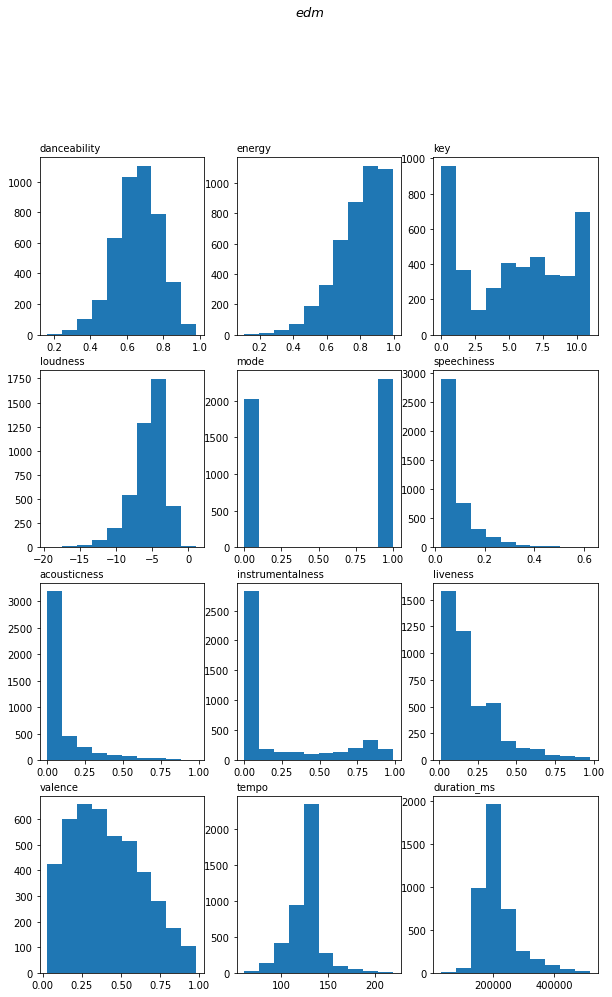

In [32]:
edm = songs[songs['playlist_genre']=='edm']

num=0
for column in cols:
    num+=1

    plt.subplot(4,3, num)
    plt.rcParams['figure.figsize'] = [10, 15]
    plt.hist(edm[column], label=column)

    plt.title(column, loc='left', fontsize=10, fontweight=0)

# general title
plt.suptitle("edm", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)

plt.show()

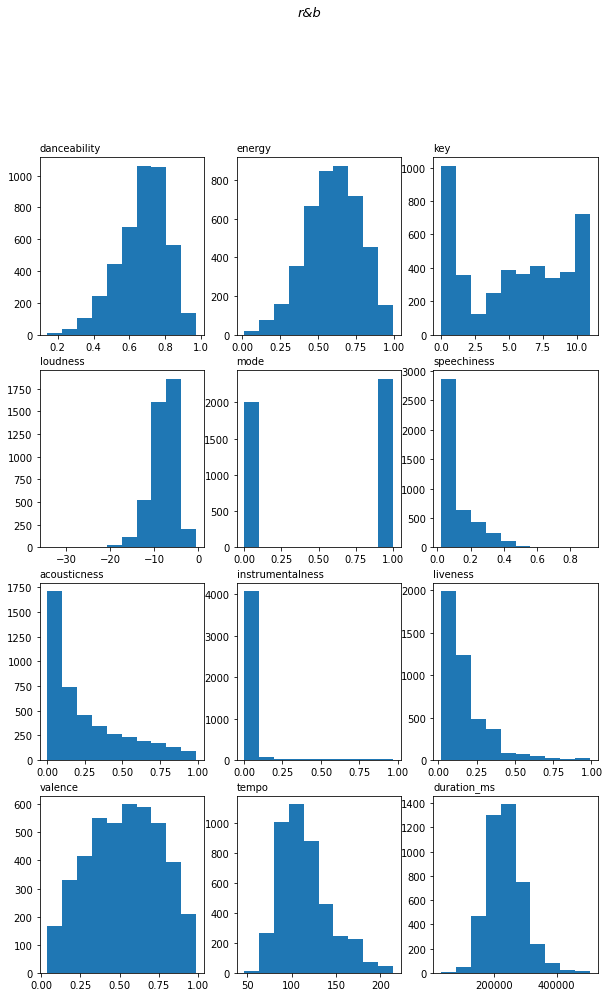

In [34]:
r_and_b = songs[songs['playlist_genre']=='r&b']

num=0
for column in cols:
    num+=1

    plt.subplot(4,3, num)
    plt.rcParams['figure.figsize'] = [10, 15]
    plt.hist(r_and_b[column], label=column)

    plt.title(column, loc='left', fontsize=10, fontweight=0)

# general title
plt.suptitle("r&b", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)

plt.show()

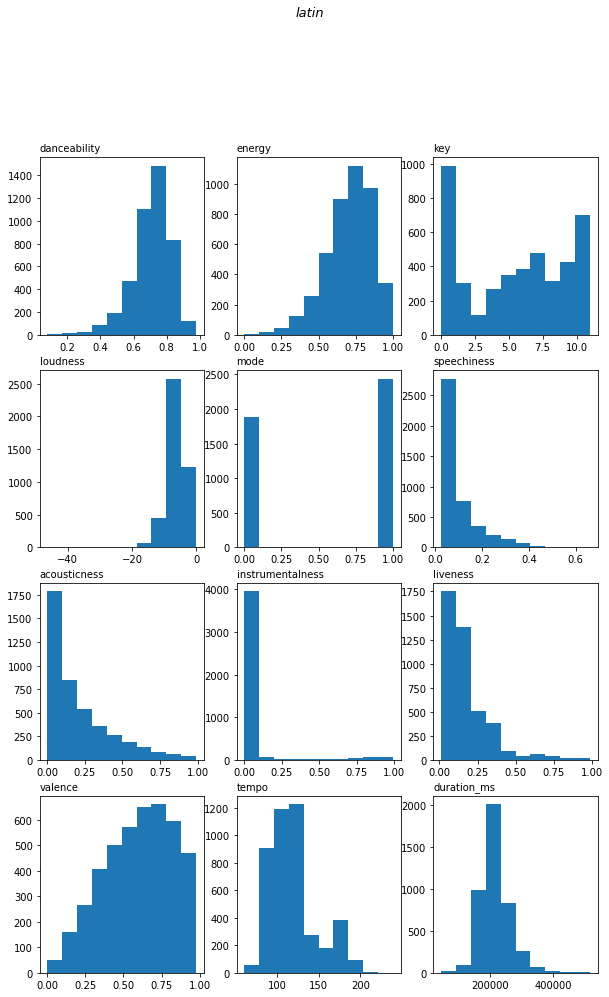

In [36]:
latin = songs[songs['playlist_genre']=='latin']

num=0
for column in cols:
    num+=1

    plt.subplot(4,3, num)
    plt.rcParams['figure.figsize'] = [10, 15]
    plt.hist(latin[column], label=column)

    plt.title(column, loc='left', fontsize=10, fontweight=0)

# general title
plt.suptitle("latin", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)

plt.show()

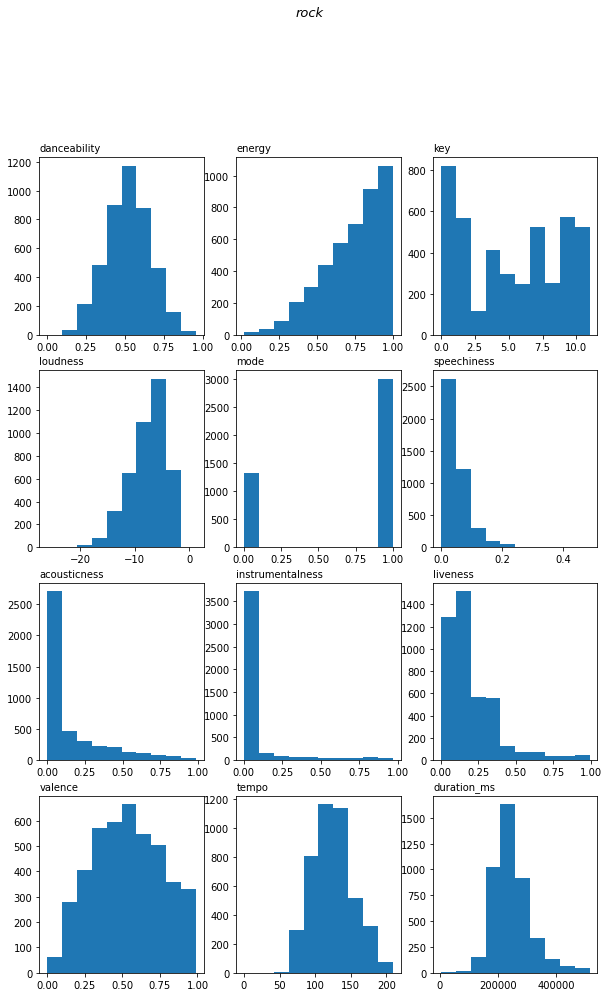

In [37]:
rock = songs[songs['playlist_genre']=='rock']

num=0
for column in cols:
    num+=1

    plt.subplot(4,3, num)
    plt.rcParams['figure.figsize'] = [10, 15]
    plt.hist(rock[column], label=column)

    plt.title(column, loc='left', fontsize=10, fontweight=0)

# general title
plt.suptitle("rock", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)

plt.show()

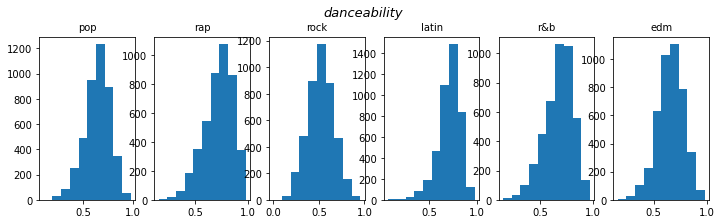

In [65]:
num=0
for genre in map_genres.keys():
    num+=1

    plt.subplot(1,6, num)
    plt.rcParams['figure.figsize'] = [10, 3]
    plt.hist(songs[songs['playlist_genre']==genre]['danceability'], label=genre)

    plt.title(genre, loc='center', fontsize=10, fontweight=0)

# general title
plt.suptitle("danceability", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)

plt.show()